<h1> Lecture 32 

Data Science 8, Spring 2021 </h1>

<h3>
<b>
<ul>
<li>Residuals</li>
</ul>
</b>
</h3>

In [1]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

#The following allows porting images into a Markdown window
#Syntax: ![title](image_name.png)
from IPython.display import Image

<h3> Regression Line versus Other Lines</h3>

In [2]:
def standard_units(arr):
    """ Converts an array to standard units """
    return (arr - np.average(arr))/np.std(arr)

def correlation(t, x, y):
    """ Computes correlation coefficient: t is a table, and x and y are column names """
    x_standard = standard_units(t.column(x))
    y_standard = standard_units(t.column(y))
    return np.average(x_standard * y_standard)

def slope(t, x, y):
    """ Computes the slope of the regression line, like correlation above """
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    """ Computes the intercept of the regression line, like slope above """
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

def fitted_values(t, x, y):
    """Return an array of the regression estimates (predictions) at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

## Residuals

In [3]:
demographics = Table.read_table('district_demographics2016.csv')
demographics = demographics.drop(
    'State', 'District', 'Percent voting for Clinton')
demographics.show(5)

Median Income,College%
47083,24
42035,21.8
46544,22.8
41110,17
51690,30.3


In [4]:
def residuals(t, x, y):
    predictions = fitted_values(t, x, y)
    return t.column(y) - predictions

In [5]:
demographics = demographics.with_columns(
    'Fitted Value', fitted_values(demographics, 'College%', 'Median Income'),
    'Residual', residuals(demographics, 'College%', 'Median Income')
)
demographics

Median Income,College%,Fitted Value,Residual
47083,24,51299.4,-4216.42
42035,21.8,48503.9,-6468.87
46544,22.8,49774.6,-3230.58
41110,17,42404.5,-1294.51
51690,30.3,59304.8,-7614.84
61413,36.7,67437.3,-6024.33
34664,19.4,45454.2,-10790.2
76440,29.6,58415.3,18024.7
50537,24.5,51934.8,-1397.77
49072,34,64006.4,-14934.4


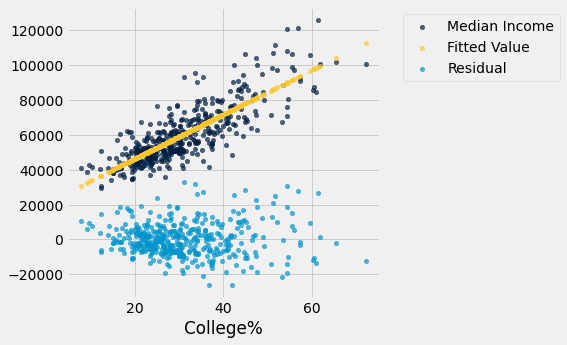

In [6]:
demographics.scatter('College%')

In [7]:
def plot_residuals(t, x, y):
    tbl = t.with_columns(
        'Fitted', fitted_values(t, x, y),
        'Residual', residuals(t, x, y)
    )
    tbl.select(x, y, 'Fitted').scatter(0)
    tbl.scatter(x, 'Residual')

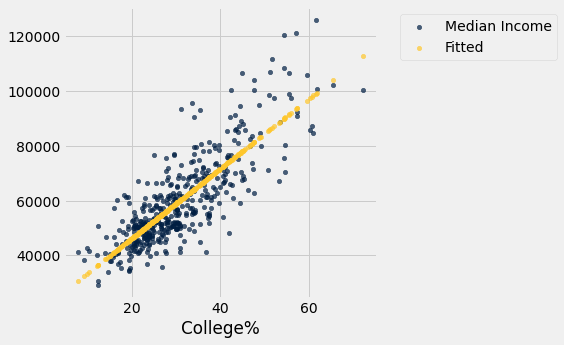

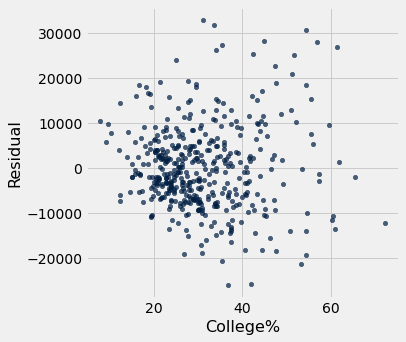

In [8]:
plot_residuals(demographics, 'College%', 'Median Income')

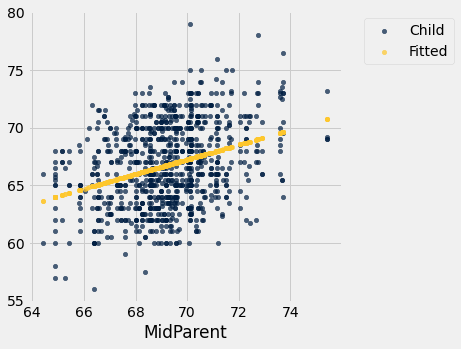

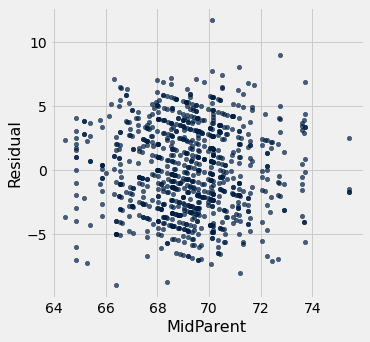

In [9]:
heights = Table.read_table('heights.csv')

heights = Table().with_columns(
    'MidParent', heights.column('midparentHeight'),
    'Child', heights.column('childHeight')
    )
plot_residuals(heights, 'MidParent', 'Child')

SLIDE: Regression Diagnostics

## Dugongs ##

In [10]:
dugong = Table.read_table('dugong.csv')
dugong.show(5)

Length,Age
1.8,1
1.85,1.5
1.87,1.5
1.77,1.5
2.02,2.5


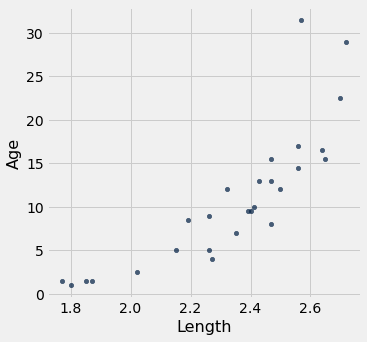

In [11]:
dugong.scatter('Length', 'Age')

<h4>Let's use the length of the dugong and see if we can predict how old it is.</h4>

In [12]:
correlation(dugong, 'Length', 'Age')

0.8296474554905714

<h5>That's a high correlation coefficient.</h5>

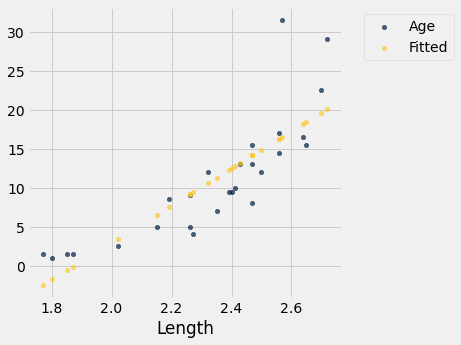

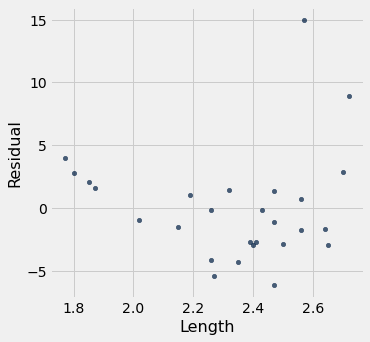

In [13]:
plot_residuals(dugong, 'Length', 'Age')

<h4>Does the residuals scatter plot support a linear association between length and age?</h4>

<h3>US Women</h3>

In [17]:
us_women = Table.read_table('us_women.csv')
us_women.show()

height,ave weight
58,115
59,117
60,120
61,123
62,126
63,129
64,132
65,135
66,139
67,142


In [18]:
us_women.num_rows

15

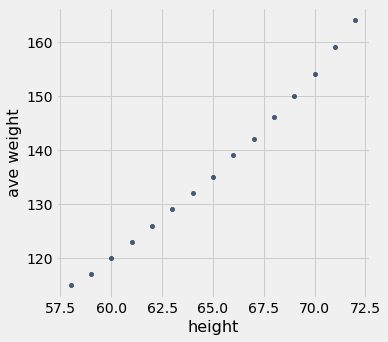

In [15]:
us_women.scatter('height')

In [19]:
correlation(us_women, 'height', 'ave weight')

0.9954947677842161

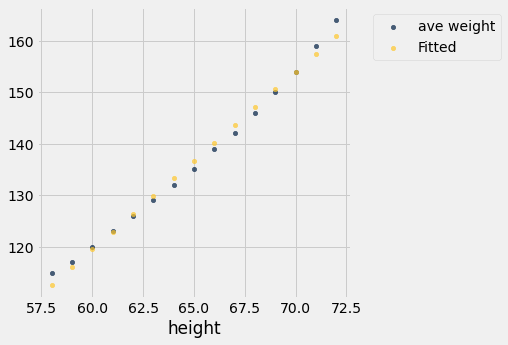

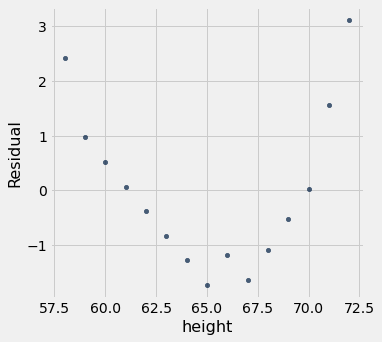

In [20]:
plot_residuals(us_women, 'height', 'ave weight')

SLIDE: Residual Plot slide after dugongs

<h3>Properties of Residuals</h3>

<h4>Average of Residuals</h4>

<h5>Residuals for the Dugong Data Set</h5>

In [23]:
round(np.average(residuals(dugong, 'Length', 'Age')), 6)

0.0

<h5>Residuals for the Family-Heights Data Set</h5>

In [21]:
round(np.average(residuals(heights, 'MidParent', 'Child')), 6)

0.0

<h5>Residuals for the District-Demographics Data Set</h5>

In [22]:
round(np.average(residuals(demographics, 'College%', 'Median Income')), 6)

0.0

<h4><u>Note</u>: Whether or not a linear association governs the data set, the sum of the residuals (errors) for the best-fit line (or curve) is zero&mdash;always!</h4>

<h4>Correlation of Residuals</h4>

In [25]:
heights = heights.with_columns(
    'Residual', residuals(heights, 'MidParent', 'Child'),
    'Fitted Value', fitted_values(heights, 'MidParent', 'Child')
)


<h5>Correlation of MidParent Heights and Residuals for the Family-Heights Data Set</h5>

In [26]:
round(correlation(heights, 'MidParent', 'Residual'), 6)

-0.0

<h5>Correlation of Fitted Values and Residuals for the Family-Heights Data Set</h5>

In [27]:
round(correlation(heights, 'Fitted Value', 'Residual'), 6)

-0.0

SLIDE: Properties of Residuals

## A Measure of Clustering ##

In [28]:
def plot_fitted(t, x, y):
    tbl = t.select(x, y)
    tbl.with_columns('Fitted Value', fitted_values(t, x, y)).scatter(0)

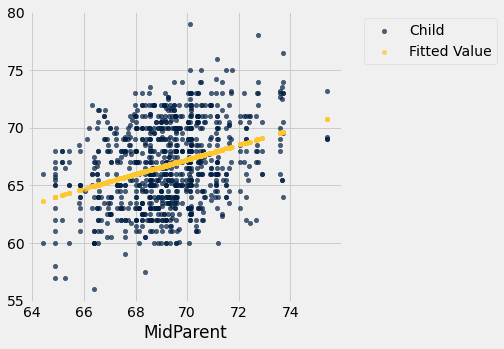

In [29]:
plot_fitted(heights, 'MidParent', 'Child')

<h4>Look at the vertical standard deviation of the fitted values ($y$ values of the yellow line) from the Heights data set.</h4>

In [30]:
child_predictions_sd = np.std(fitted_values(heights, 'MidParent', 'Child'))
child_predictions_sd

1.148145168378806

<h4>The above is the standard deviation of an informed estimate.</h4>

<h4> Look at the vertical standard deviation of the actual heights (𝑦
values of the scatter plot, the blue points) from the Heights data set.</h4>

In [31]:
child_observed_sd = np.std(heights.column('Child'))
child_observed_sd

3.5773346010057634

<h4>The above is the standard deviation of an ignorant (blind) estimate.</h4>

<h4>What about the standard deviation of the error if we make a prediction knowing the heights of the parents?<br>
    
<u>Answer</u>: In that case, the standard deviation is simply the standard deviation of the errors (residuals).</h4>

<h4><u>Note</u>: The above corresponds to the case where we're not given the parental heights, but we're asked to make a guess as to what the child's height is&mdash;that is, provide a best <u>blind</u> guess.<br>
    
We'd then use the mean of the children's heights as our best guess.  In that case, our error (residual) standard deviation is simply the standard deviation of the children's heights.</h4>

<h4>So we're looked at <br>
<ul><li>the standard deviation of the actual values;</li><br>
        
<li>the standard deviation of the fitted values; and</li><br>
        
<li>the standard deviation of the residuals.</li>
</ul>
We'll now look at how they relate.
</h4>

<h5>Ratio of the SD of the predictions (fitted values) and the SD of the actual values:</h5>

In [32]:
child_predictions_sd / child_observed_sd

0.32094989606395957

<h5>The correlation coefficient of the MidParent Height (i.e., $x$) and Child Height (i.e., $y$) is the same as the ratio above:</h5>

In [33]:
correlation(heights, 'MidParent', 'Child')

0.32094989606395924

<h5>Test the same thing on the dugong data set:</h5>

In [36]:
dugong_prediction_sd = np.std(fitted_values(dugong, 'Length', 'Age'))
dugong_observed_sd = np.std(dugong.column(1))

<h5>Ratio of the SD of the predictions (fitted values) and the SD of the actual values:</h5>

In [37]:
dugong_prediction_sd / dugong_observed_sd

0.8296474554905713

<h5>The correlation coefficient of the Dugong Length (i.e., $x$) and Dugong Age (i.e., $y$) is the same as the ratio above:</h5>

In [35]:
correlation(dugong, 'Length', 'Age')

0.8296474554905714

<h3>Acceleration and MPG relationship in a data set of hybrid cars.</h3>

In [38]:
hybrid = Table.read_table('hybrid.csv')
hybrid.show(5)

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact


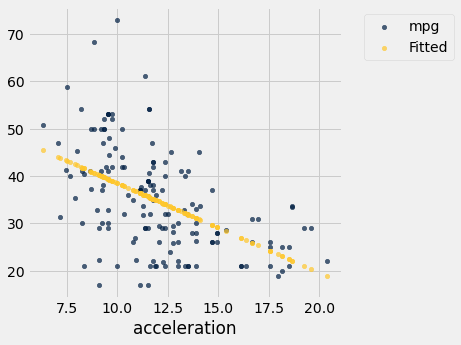

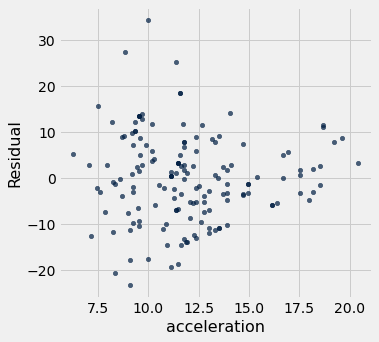

In [39]:
plot_residuals(hybrid, 'acceleration', 'mpg')

<h4>The residuals scatter plot above has a wedge shape.  It's <u>not</u> a patternless blob. It has <i>heteroskasticity&mdash;the variability changes (in this case, reduced) as we go along the horizontal axis.</i> (This is outside the scope of this course).</h4>

<h4>The correlation coefficient between Acceleration and MPG is negative, as expected.</h4>

In [40]:
correlation(hybrid, 'acceleration', 'mpg')

-0.5060703843771186

<h5>Ratio of the SD of the predictions (fitted values) and the SD of the actual values:</h5>

In [41]:
np.std(fitted_values(hybrid, 'acceleration', 'mpg'))/np.std(hybrid.column('mpg'))

0.5060703843771186

<h4>In this case, the correlation coefficient is the <i>negative</i> of the ratio of the two SDs.  Note that the ratio of the SDs can never be negative, because SD is never negative.</h4>

No matter what the shape of the scatter plot, the SD of the predictions (fitted values, $\widehat{y}$) is a fraction of the SD of the observed values of $y$. The fraction is |r|.

$$
\frac{\mbox{SD of fitted values}}{\mbox{SD of }y} ~=~ |r| ~~~~~~~~~~ \mbox{That is,} ~~ \mbox{SD of fitted values} = |r|\cdot \mbox{SD of }y
$$

SLIDE: SD of Fitted Values

<h3> SD of the Residuals </h3>
No matter what the shape of the scatter plot, the SD of the residuals is a fraction of the SD of the observed values of $y$. The fraction is  $\sqrt{1-r^2}$.

$$
\mbox{SD of residuals} ~=~ \sqrt{1 - r^2} \cdot \mbox{SD of }y
$$

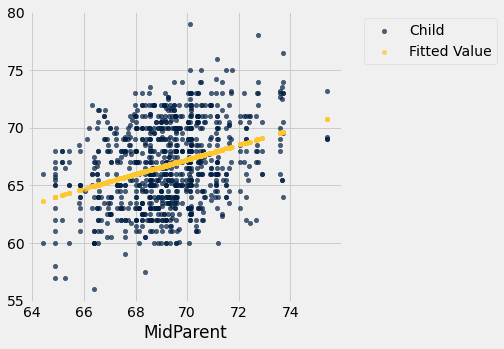

In [42]:
plot_fitted(heights, 'MidParent', 'Child')

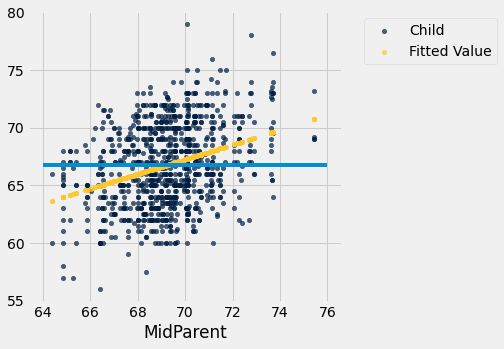

In [43]:
plot_fitted(heights, 'MidParent', 'Child')
ave_child = np.mean(heights.column('Child'))
plots.plot([64, 76], [ave_child, ave_child]);

<h3>Child Heights</h3>

<h4>Variance of the Child Heights (based on blind estimation w/o knowing MidParent Heights)</h4>

In [44]:
np.std(heights.column('Child')) ** 2

12.797322847553064

<h4>Variance of the Residuals:</h4>

In [45]:
np.std(residuals(heights, 'MidParent', 'Child')) ** 2

11.47908551988147

<h4>Variance of the Fitted Values (Predictions):</h4>

In [46]:
np.std(heights.column('Fitted Value')) ** 2

1.3182373276715966

<h4>Note that:<br><br> Variance of the Residuals + Variance of Fitted Values = Variance of the Observed Child Heights:</h4>

In [47]:
np.std(residuals(heights, 'MidParent', 'Child')) ** 2 + np.std(heights.column('Fitted Value')) ** 2

12.797322847553067

<h3>Dugongs</h3>

In [48]:
np.std(dugong.column('Age')) ** 2

59.635802469135804

In [49]:
np.std(fitted_values(dugong, 'Length', 'Age')) ** 2

41.04821143693533

In [50]:
np.std(residuals(dugong, 'Length', 'Age')) ** 2

18.58759103220045

<h4>Correlation Coefficient of Child Heights:</h4>

In [51]:
r = correlation(heights, 'MidParent', 'Child')
r

0.32094989606395924

In [52]:
np.sqrt(1 - r**2) * np.std(heights.column('Child'))

3.388079916395342

<h4>Compare with the SD of the Residuals:</h4>

In [54]:
np.std(residuals(heights,'MidParent','Child'))

3.3880799163953426

<h4>Now try on the Hybrid Car Data:</h4>

In [56]:
r = correlation(hybrid, 'acceleration', 'mpg')
r

-0.5060703843771186

In [57]:
np.sqrt(1 - r**2)*np.std(hybrid.column('mpg'))

9.43273683343029

<h4>Compare with the SD of the Residuals:</h4>

In [55]:
np.std(residuals(hybrid, 'acceleration', 'mpg'))

9.43273683343029